# Normalization of data in the MNIST database to later be used for machine learning algorithms.

In [16]:
import pyodbc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%% Importing data from local SQL server

driver = '{SQL Server}'
server = 'LAPTOP-S1H0GINM\MYSERVER' 
database = 'MNIST' 
conn = pyodbc.connect('Driver=' +driver+ ';'
                      'Server=' +server+ ';'
                      'Database=' +database+ ';'
                      'Trusted_Connection=yes;')

table = '.dbo.mnist'
sql_query = pd.read_sql_query('SELECT * FROM ' +database+ table,conn)

mnist_org = pd.DataFrame(sql_query).astype(float)

#### Test to see if any data is missing

In [19]:
if mnist_org.isnull().values.any() == True:
    for col in mnist_org.columns:
        pct_missing = np.mean(mnist_org[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
else:
    print('No NaN in DataBase')

No NaN in DataBase


#### Plot of the original data including columns 90 through 110 and row 0 through 1000.
This is only a small fraction of the data that is plotted since the dataset is extreamly large. 

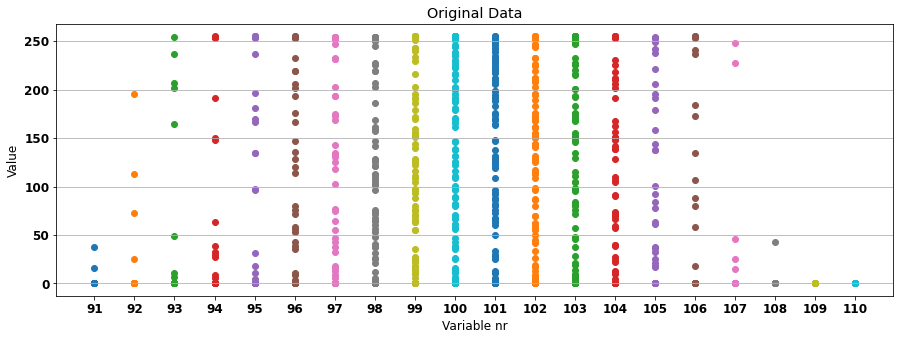

In [28]:
plt.rcParams.update({'font.size': 12})

def plot_v1(df,title):
    df = df.iloc[0:1000 , 90:110 ]
    plt.figure(figsize=(15,5))
    plt.grid(axis='y')
    
    for column in df.columns:
        plt.scatter(df[column].count()*[column],df[column])
    plt.xlabel('Variable nr')
    plt.ylabel('Value')
    plt.title(title)
    plt.show()
    
temp = mnist_org.drop(columns=['Column 0','0'])
title0 = 'Original Data'

plot_v1(temp,title0)

#### Absolute Maximum Normalization performed column vise

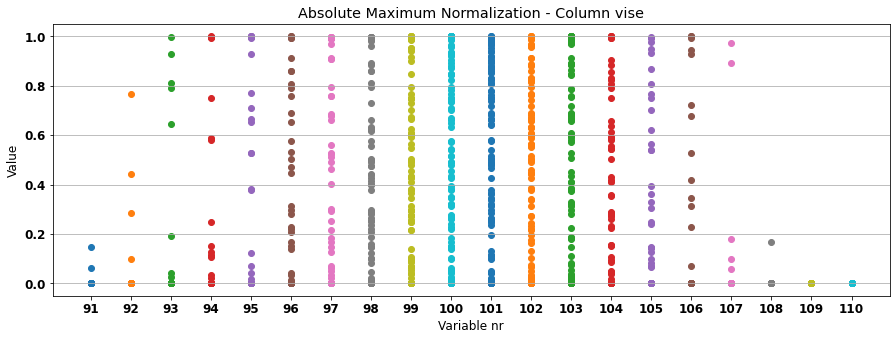

In [50]:
Abs_Max_col = mnist_org.drop(columns=['Column 0','0'])

for column in Abs_Max_col.columns:
    if mnist_org[column].abs().max() != 0:
           Abs_Max_col[column] = mnist_org[column] / mnist_org[column].abs().max()

title1 = 'Absolute Maximum Normalization - Column vise' 
plot_v1(Abs_Max_col,title1)

#### Absolute Maximum Normalization performed with the max of the entiere set

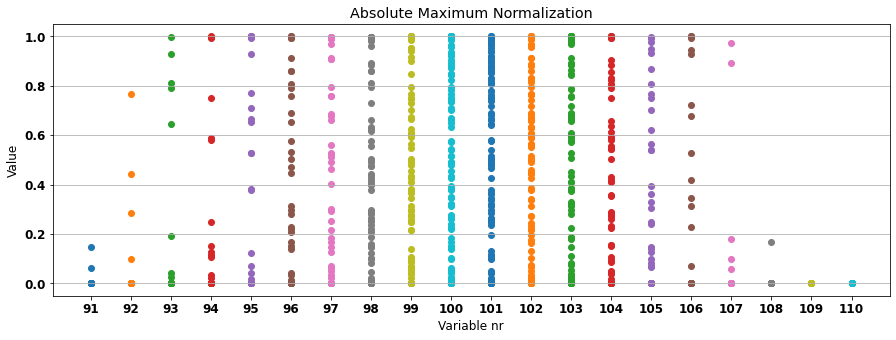

In [33]:
mnist_modi = mnist_org.drop(columns=['Column 0','0'])
mnist_max = mnist_modi.abs().max().max()

Abs_Max_tot = mnist_modi / mnist_max

title2 = 'Absolute Maximum Normalization'
plot_v1(Abs_Max_tot,title2)

#### Min Max Feauture Scaling

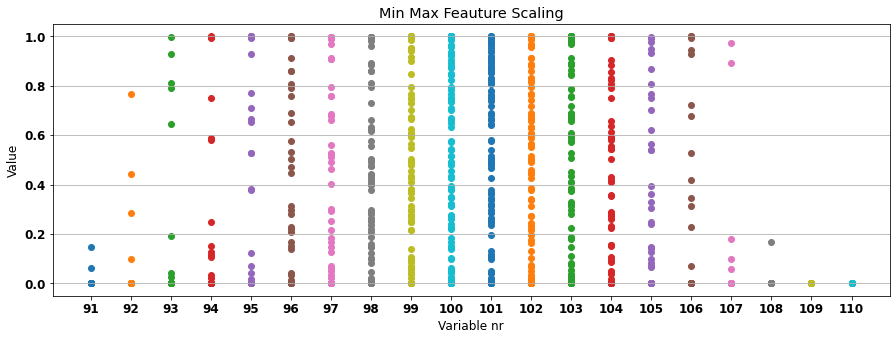

In [32]:
Min_Max = mnist_org.drop(columns=['Column 0','0'])

for column in Min_Max.columns:
    if mnist_org[column].max() != 0:
        Min_Max[column] = (mnist_org[column] - mnist_org[column].min()) / (mnist_org[column].max() - mnist_org[column].min())

title3 = 'Min Max Feauture Scaling'
plot_v1(Min_Max,title3)

#### Z-Score Standardization

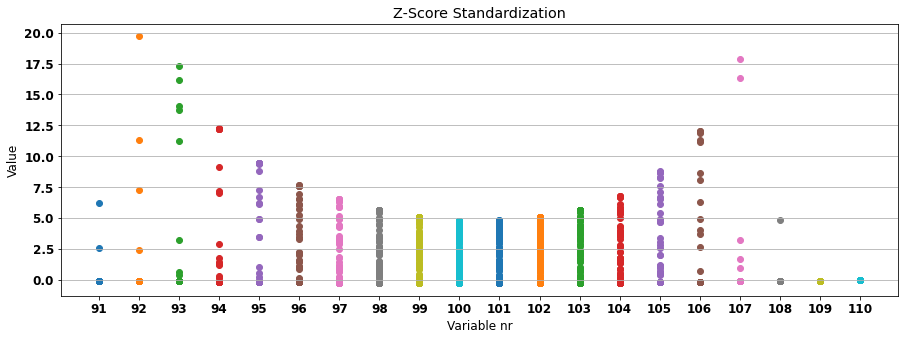

In [34]:
Z_standard = mnist_org.drop(columns=['Column 0','0'])

for column in Z_standard.columns:
    if mnist_org[column].max() != 0:
        Z_standard[column] = (mnist_org[column] - mnist_org[column].mean()) / mnist_org[column].std()

title4 = 'Z-Score Standardization'
plot_v1(Z_standard,title4)

#### The Robust Scaling

In [1]:
Robust = mnist_org.drop(columns=['Column 0','0'])

for column in Robust.columns:
    if mnist_org[column].max() != 0:
        Robust[column] = (mnist_org[column] - mnist_org[column].median())  / (mnist_org[column].quantile(0.75) - mnist_org[column].quantile(0.25))

print(Robust.iloc[0:10 , 90:105])
print()
print(mnist_org.drop(columns=['Column 0','0']).quantile(0.25))


NameError: name 'mnist_org' is not defined